<a href="https://colab.research.google.com/github/likeshd/predictive_analysis/blob/main/visualize_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As an example of working with some time series data, let’s take a look at bicycle counts on Seattle’s Fremont Bridge. This data comes from an automated bicycle counter, which has inductive sensors on the east and west sidewalks of the bridge.

In [6]:
import pandas as pd
data = pd.read_csv("/content/FremontBridge.csv", index_col= 'Date',parse_dates=['Date'])
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147278 entries, 2019-11-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fremont Bridge Total          147256 non-null  float64
 1   Fremont Bridge East Sidewalk  147256 non-null  float64
 2   Fremont Bridge West Sidewalk  147255 non-null  float64
dtypes: float64(3)
memory usage: 4.5 MB


In [8]:
data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,147256.000000,147256.000000,147255.000000
mean,110.340794,50.077504,60.263699
std,140.421808,64.633895,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


# Visualizing the data
We can gain some insight into the dataset by visualizing it. Let’s start by plotting the raw data

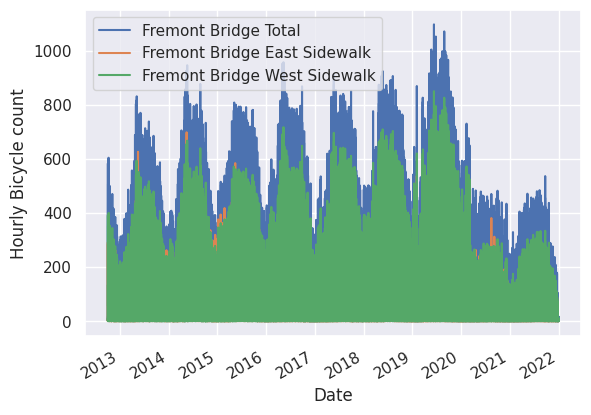

In [9]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let’s resample by week:



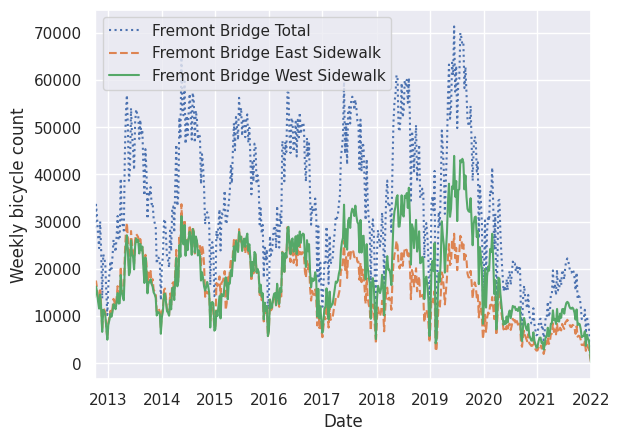

In [10]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.


Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our data, making sure to center the window:

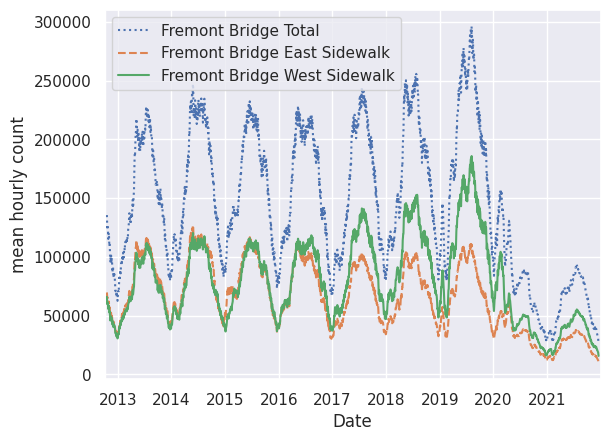

In [11]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window

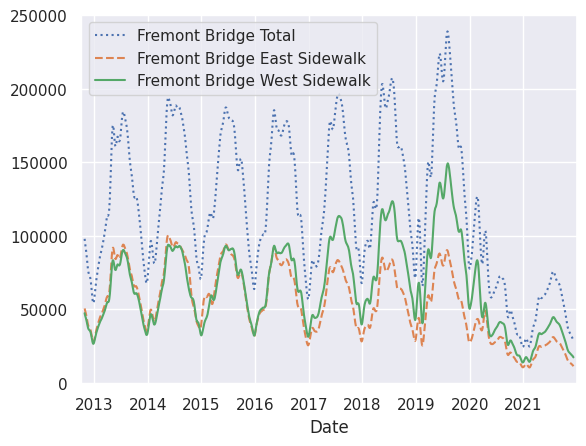

In [12]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

# Digging into the data
While the smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality

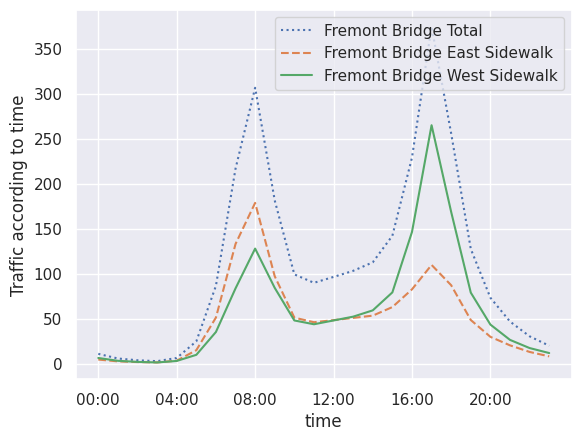

In [13]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()